<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Heart Disease
Heart disease is one of the main causes of death worldwide, so this is a good start to use data science for good.

To learn how to prevent heart disease is necessary to know how to reliably detect it first.

There is a dataset from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is courtesy of **Yeh, I-Cheng** via the **UCI Machine Learning** repository:
- Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008, doi:10.1016/j.eswa.2008.07.018.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data

## Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the [**Blood Transfusion Service Center Data Set**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) in Hsin-Chu City in Taiwan.
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.
        e-mail:icyeh 'at' chu.edu.tw
        Tel: 886-3-5186511
        Date Donated: October 3, 2008 

- Citation Request:
- **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM 
    model using Bernoulli sequence, "Expert Systems with Applications, 2008 
    (doi:10.1016/j.eswa.2008.07.018).

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [14]:
# Import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 

In [ ]:
conda install python-graphviz


In [2]:
# Read data in pandas
transfusion_csv = 'C:/Users/user/Documents/IOD_data_MAIN/DATA/transfusion.data'
df = pd.read_csv(transfusion_csv)

# Check data has loaded correctly
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
# Perform EDA by investigating each of the points above 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
df.columns = ['Recency', 'Frequency', 'Monetary', 'Times', 'Donated_blood']

In [6]:
df.duplicated().sum()

215

In [7]:
duplicate_df = df.duplicated()
duplicates = df[duplicate_df]
pd.set_option('display.max_rows', duplicates.shape[0]+1)
duplicates

,Recency,Frequency,Monetary,Times,Donated_blood
18,2,6,1500,15,1
20,2,3,750,4,1
23,2,6,1500,16,1
32,4,10,2500,28,1
43,2,5,1250,16,0
48,2,2,500,2,0
49,2,2,500,2,0
71,2,4,1000,16,0
75,2,2,500,4,1
77,2,2,500,4,0


In [11]:
df2 = df.drop_duplicates()
df2

,Recency,Frequency,Monetary,Times,Donated_blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [23]:
df

,Recency,Frequency,Monetary,Times,Donated_blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [19]:
df.isnull().sum()

Recency          0
Frequency        0
Monetary         0
Times            0
Donated_blood    0
dtype: int64

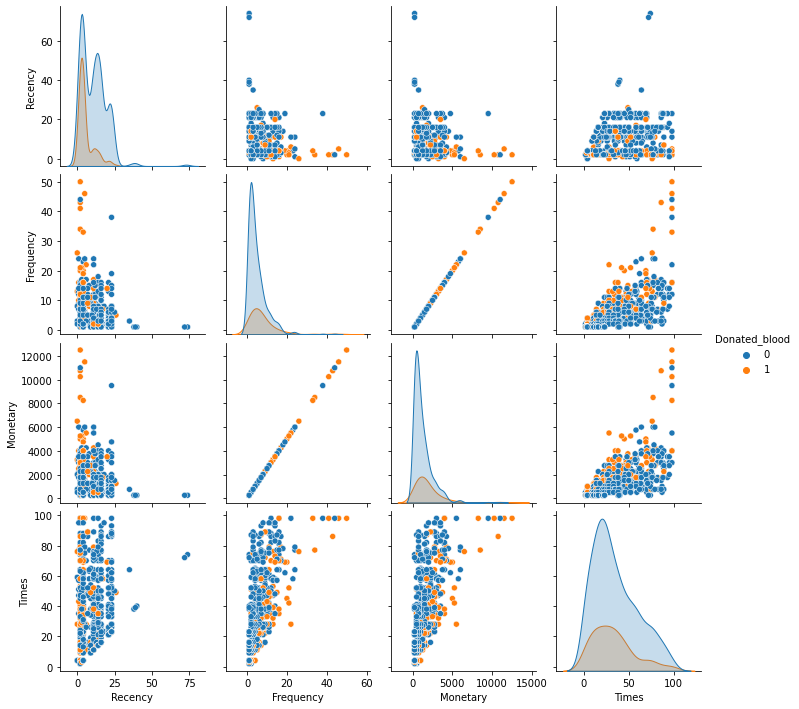

In [9]:
sns.pairplot(df, hue = 'Donated_blood' )

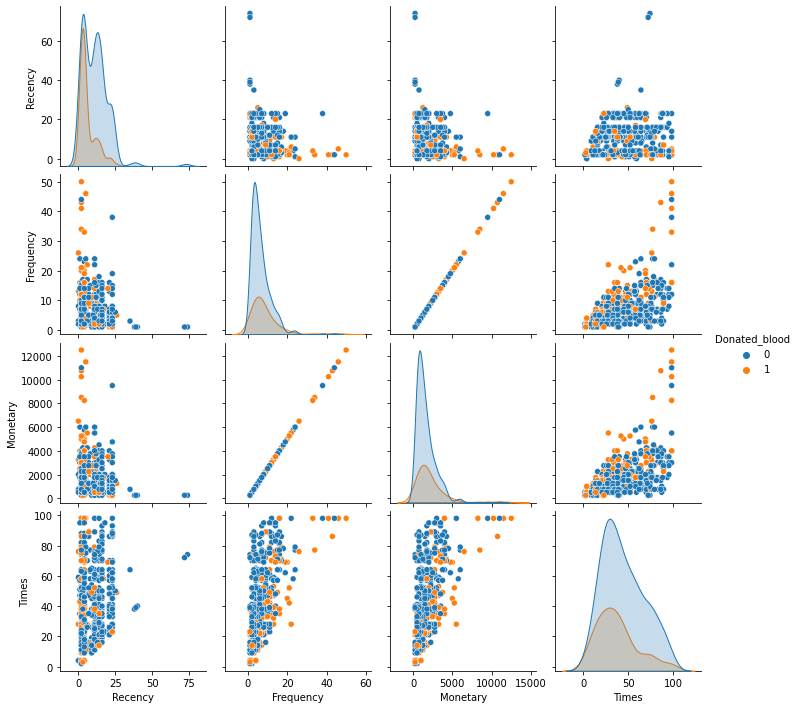

In [12]:
sns.pairplot(df2, hue = 'Donated_blood')

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        748 non-null    int64
 1   Frequency      748 non-null    int64
 2   Monetary       748 non-null    int64
 3   Times          748 non-null    int64
 4   Donated_blood  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 747
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Recency        533 non-null    int64
 1   Frequency      533 non-null    int64
 2   Monetary       533 non-null    int64
 3   Times          533 non-null    int64
 4   Donated_blood  533 non-null    int64
dtypes: int64(5)
memory usage: 25.0 KB


In [13]:
# Filter/subset/clean the data according to your EDA findings
#feat = df.drop('Donated_blood',axis=1)
X = df[['Recency', 'Frequency', 'Monetary', 'Times']]
y = df['Donated_blood']

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [15]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [16]:
# Define ML model(s)
model = DecisionTreeClassifier(random_state=10)



# Hyper-parameter

# Step 9: Fit the Model

In [19]:
# Fit model

model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [20]:
# Evaluate model against training set
model.score(X_train, y_train)


0.9579349904397706

In [21]:
y_train_pred = model.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Precision:",metrics.precision_score(y_train,y_train_pred))
print("Recall:",metrics.recall_score(y_train,y_train_pred))

Accuracy: 0.9579349904397706
Precision: 0.9897959183673469
Recall: 0.8220338983050848


In [68]:
# My test set result is so bad compare to training set result 


Accuracy: 0.6711111111111111
Precision: 0.3541666666666667
Recall: 0.2833333333333333


In [69]:
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=10)>

In [ ]:
# Evaluate model against test set

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [22]:
model.score(X_test,y_test)

0.6711111111111111

In [23]:
y_pred = model.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.6711111111111111
Precision: 0.3541666666666667
Recall: 0.2833333333333333


# Step 12: Feature Importance

In [74]:
model.feature_importances_

array([0.26300349, 0.08184815, 0.18423613, 0.47091223])

Trying using remove duplicate data 

In [79]:
X2 = df2[['Recency', 'Frequency', 'Monetary', 'Times']]
y2 = df2['Donated_blood']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [82]:
model.fit(X2_train,y2_train)

DecisionTreeClassifier(random_state=10)

In [83]:
y2_p_test = model.predict(X2_test)
y2_p_train = model.predict(X2_train)

In [85]:
# Test result 
print("Accuracy:",metrics.accuracy_score(y2_test, y2_p_test))
print("Precision:",metrics.precision_score(y2_test,y2_p_test))
print("Recall:",metrics.recall_score(y2_test,y2_p_test))

Accuracy: 0.6375
Precision: 0.3333333333333333
Recall: 0.38095238095238093


In [86]:
print("Accuracy:",metrics.accuracy_score(y2_train, y2_p_train))
print("Precision:",metrics.precision_score(y2_train,y2_p_train))
print("Recall:",metrics.recall_score(y2_train,y2_p_train))

Accuracy: 0.9410187667560321
Precision: 1.0
Recall: 0.794392523364486


# Step 13: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

# Step 14: Visualise the Decision Tree

In [77]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model,
                                out_file=None, 
                      feature_names=X,  
                      class_names=y,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

ValueError: Length of feature_names, 748 does not match number of features, 4

In [76]:
!pip install graphviz